## **B题  生产过程中的决策问题** 
某企业生产某种畅销的电子产品，需要分别购买两种零配件（零配件1和零配件2），
在企业将两个零配件装配成成品。在装配的成品中，只要其中一个零配件不合格，则成品一
定不合格；如果两个零配件均合格，装配出的成品也不一定合格。对于不合格成品，企业可
以选择报废，或者对其进行拆解，拆解过程不会对零配件造成损坏，但需要花费拆解费用。 
请建立数学模型，解决以下问题： 

**问题1**  供应商声称一批零配件（零配件1或零配件2）的次品率不会超过某个标称值。
企业准备采用抽样检测方法决定是否接收从供应商购买的这批零配件，检测费用由企业自行
承担。请为企业设计检测次数尽可能少的抽样检测方案。 
如果标称值为10%，根据你们的抽样检测方案，针对以下两种情形，分别给出具体结果：
<br> 
(1) 在95%的信度下认定零配件次品率超过标称值，则拒收这批零配件；
<br> 
(2) 在90%的信度下认定零配件次品率不超过标称值，则接收这批零配件。


### 原假设 $ H_0: μ \leq 10\%, H_1: μ > 10\% $
### 对于零件的每次选取，只有次品和非次品两种结果,而一般供应商处的零配件数量非常大,放回抽样与不放回抽样的结果近似
### 因此不合格的零件数量符合二项分布
### 记 $ X $ 为不合格零件数 则 $ X \sim Bin(n,10\%)  $
### 这里初步有两个想法
### 1: 将模型近似化为正态分布
### 2: 使用二项分布计算

### 对于二项分布
$
    P(X = k) = \binom{n}{k}p^k(1 - p)^{n - k}~~(k = 0,1,\ldots,n) \\
    X \sim Bin(n,p)
$
<br>

### 可近似为 正态分布
$
    X \sim N(np,npq), ~如果 np > 5且n(1 - p) > 5
$

### 不管能否近似为正态分布，先近似为正态分布
### 这里干脆选择二分算法确定样本量,初步暂定枚举区间为 $ 1 \sim 10000 $

### 假定抽取样本量为 n 使用蒙特卡洛抽取

### 计算出95%信度下的置信区间
$ 记\bar{X}为样本均值,\sigma^2为样本标准差 $
$$ X \sim N(np,npq) $$
$$ 则有 \frac{\bar{X} - μ}{\frac{\sigma}{\sqrt{n}}} \sim N(0,1) $$

$ 我们希望 | \bar{X} - μ | \geq c 时拒绝,即 \left| \frac{\bar{X} - μ}{\frac{\sigma}{\sqrt{n}}} \right| \geq \frac{c}{\frac{\sigma}{\sqrt{n}}} = k $

### 参考下表
<br>
<div style = "text-align: center;">
    <img src = "问题1-01.png">
</div>
<br>

$
    综上可选取 k = 1.65 \\
    即 \frac{c}{\frac{\sigma}{\sqrt{n}}} = 1.65 \\
    此时算出置信区间
$

### 每个样本量n 模拟100次抽取 如果有98次左右超出置信区间，则认为这个样本量n的抽取是可行的
### 继续枚举n


[0.93, 0.9533333333333334, 0.9333333333333333, 0.9433333333333334, 0.96, 0.9533333333333334, 0.9566666666666667, 0.9466666666666667, 0.91, 0.95, 0.9666666666666667, 0.9433333333333334, 0.9633333333333334, 0.94, 0.94, 0.9533333333333334, 0.9566666666666667, 0.95, 0.92, 0.9333333333333333, 0.9633333333333334, 0.9533333333333334, 0.94, 0.9566666666666667, 0.9333333333333333, 0.9333333333333333, 0.9566666666666667, 0.9666666666666667, 0.9566666666666667, 0.94, 0.9466666666666667, 0.9333333333333333, 0.96, 0.9466666666666667, 0.9266666666666666, 0.93, 0.9633333333333334, 0.93, 0.9366666666666666, 0.9233333333333333, 0.9333333333333333, 0.9533333333333334, 0.96, 0.9533333333333334, 0.9466666666666667, 0.95, 0.9533333333333334, 0.9466666666666667, 0.95, 0.9666666666666667, 0.95, 0.9266666666666666, 0.96, 0.94, 0.9533333333333334, 0.97, 0.95, 0.95, 0.95, 0.94, 0.9633333333333334, 0.95, 0.9533333333333334, 0.93, 0.95, 0.9333333333333333, 0.9366666666666666, 0.95, 0.9533333333333334, 0.953333333

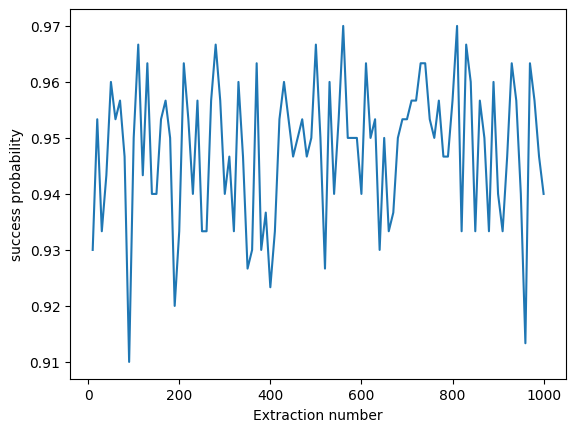

In [107]:

import numpy as np
import time
import matplotlib.pyplot as plt

np.random.seed(int(time.time()))

# 假设原件个数为 使用0表示不合格 1表示合格
total_cnt = 1000; # 总数
i_cnt = 100; # 次品数
a = np.array([0] * i_cnt + [1] * (total_cnt - i_cnt))
np.random.shuffle(a) # 打乱
p0 = 0.1 # 二项分布概率
z1 = 1.65 # (1)的信度要求对应的正太值
z2 = 1.29

min_ex_cnt = 10 # 最少抽取次数
max_ex_cnt = total_cnt # 最多抽取个数 
test_cnt = 300 # 单次测试次数

def test1(cnt: int) -> bool:
    c0,c1 = 0,0
    for k in range(cnt):
        sec = np.random.randint(0,a.size)
        if a[sec] == 0:
            c0 += 1
        else:
            c1 += 1
    p = c0 / (c0 + c1)
    z = (p - p0) / np.sqrt(p0 * (1 - p0) / cnt)
    # print(f"抽取{cnt}个样本")
    # print(f"共有{c1}个合格品,{c0}个不合格品")
    # print(f"样本次品率为{p}")
    # print(f"计算的z值为{z},预期的z1为{z1}")
    if z >= z1:
        # print(f"因为{z} >= {z1},故拒绝")
        return False
    # print(f"因为{z} < {z1},故接受")
    return True

def test2(cnt: int) -> bool:
    c0,c1 = 0,0
    for k in range(cnt):
        sec = np.random.randint(0,a.size)
        if a[sec] == 0:
            c0 += 1
        else:
            c1 += 1
    p = c0 / (c0 + c1)
    z = (p - p0) / np.sqrt(p0 * (1 - p0) / cnt)
    # print(f"抽取{cnt}个样本")
    # print(f"共有{c1}个合格品,{c0}个不合格品")
    # print(f"样本次品率为{p}")
    # print(f"计算的z值为{z},预期的z2为{z2}")
    if z >= z2:
    #    print(f"因为{z} >= {z2},故拒绝")
        return False
    # print(f"因为{z} < {z2},故接受")
    return True
    
x = [i for i in range(min_ex_cnt, max_ex_cnt + 1,10)]    
y = []

if __name__ == '__main__':
    for i in range(min_ex_cnt, max_ex_cnt + 1,10):
        ok = 0
        for j in range(test_cnt):
            if test1(i):
                ok += 1
        y.append(ok / test_cnt)
    plt.plot(x,y)
    plt.xlabel("Extraction number")
    plt.ylabel("success probability")
    print(y)
    print(x)
    plt.show()

